In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import pickle

In [5]:
df_full = pd.read_csv('data/processed_data_full.csv')
df_full

,audio,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,chroma_stft4,chroma_stft5,chroma_stft6,chroma_stft7,chroma_stft8,chroma_stft9,chroma_stft10,chroma_stft11,chroma_stft12,class
0,cleaned_9167.mp3,-230.88820,127.881310,-97.354300,22.749096,-38.050144,-8.866067,-9.577093,-33.962803,10.267275,...,0.252047,0.267637,0.183492,0.163468,0.211562,0.217781,0.298591,0.362623,0.350620,Kannada
1,cleaned_10360.mp3,-319.90225,111.102905,-7.510077,27.595060,-3.328165,5.987702,2.072924,5.042234,7.517483,...,0.355425,0.375078,0.389735,0.342536,0.297474,0.268281,0.275895,0.304535,0.287610,Hindi
2,cleaned_16093.mp3,-400.04538,58.514076,-1.907893,20.764425,-13.259652,9.739310,-6.689917,-4.044855,-7.281422,...,0.189190,0.208865,0.218581,0.261047,0.216016,0.159607,0.130502,0.152102,0.183070,Hindi
3,cleaned_7629.mp3,-286.79388,103.182930,0.141504,7.068603,4.767405,6.976820,-11.246504,-10.972268,-12.593707,...,0.146248,0.131254,0.096827,0.092012,0.119294,0.151491,0.209447,0.285996,0.305611,Tamil
4,cleaned_20771.mp3,-358.24740,113.063980,-43.514860,-14.235402,6.537755,-26.258299,-7.914073,6.357630,-13.180340,...,0.301274,0.237942,0.191617,0.214758,0.198707,0.208391,0.193018,0.169582,0.174052,Kannada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179012,cleaned_16291.mp3,-331.60837,95.232640,3.125760,14.823277,-6.746803,30.313955,-6.609580,-5.594699,-6.361108,...,0.215574,0.251960,0.348160,0.357367,0.249649,0.170591,0.179828,0.229971,0.220438,Marathi
179013,cleaned_17191.mp3,-392.30120,98.747910,8.718032,2.322515,-5.015669,4.818001,0.611000,-5.514686,-2.298019,...,0.194520,0.202134,0.204284,0.193664,0.144450,0.139995,0.161710,0.202130,0.208180,Bengali
179014,cleaned_22133.mp3,-278.16302,110.340580,-12.299334,7.755728,7.753451,0.322464,-13.678727,-8.819210,-5.313819,...,0.113908,0.100893,0.084461,0.124678,0.249312,0.350946,0.328074,0.252226,0.220588,Tamil
179015,cleaned_12248.mp3,-409.65850,56.620080,-7.733880,26.514797,-11.139907,16.919893,-19.641703,3.554161,-11.874303,...,0.224406,0.221562,0.212124,0.185305,0.182448,0.191696,0.175225,0.210426,0.213463,Hindi


In [7]:
df_full.columns

Index(['audio', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7',
       'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14',
       'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'mfcc21',
       'mfcc22', 'mfcc23', 'mfcc24', 'mfcc25', 'mfcc_delta1', 'mfcc_delta2',
       'mfcc_delta3', 'mfcc_delta4', 'mfcc_delta5', 'mfcc_delta6',
       'mfcc_delta7', 'mfcc_delta8', 'mfcc_delta9', 'mfcc_delta10',
       'mfcc_delta11', 'mfcc_delta12', 'mfcc_delta13', 'mfcc_delta14',
       'mfcc_delta15', 'mfcc_delta16', 'mfcc_delta17', 'mfcc_delta18',
       'mfcc_delta19', 'mfcc_delta20', 'mfcc_delta21', 'mfcc_delta22',
       'mfcc_delta23', 'mfcc_delta24', 'mfcc_delta25', 'spectral_centroid',
       'spectral_bandwidth', 'spectral_contrast', 'spectral_flatness',
       'spectral_rolloff', 'chroma_stft1', 'chroma_stft2', 'chroma_stft3',
       'chroma_stft4', 'chroma_stft5', 'chroma_stft6', 'chroma_stft7',
       'chroma_stft8', 'chroma_stft9', 'chroma_stft

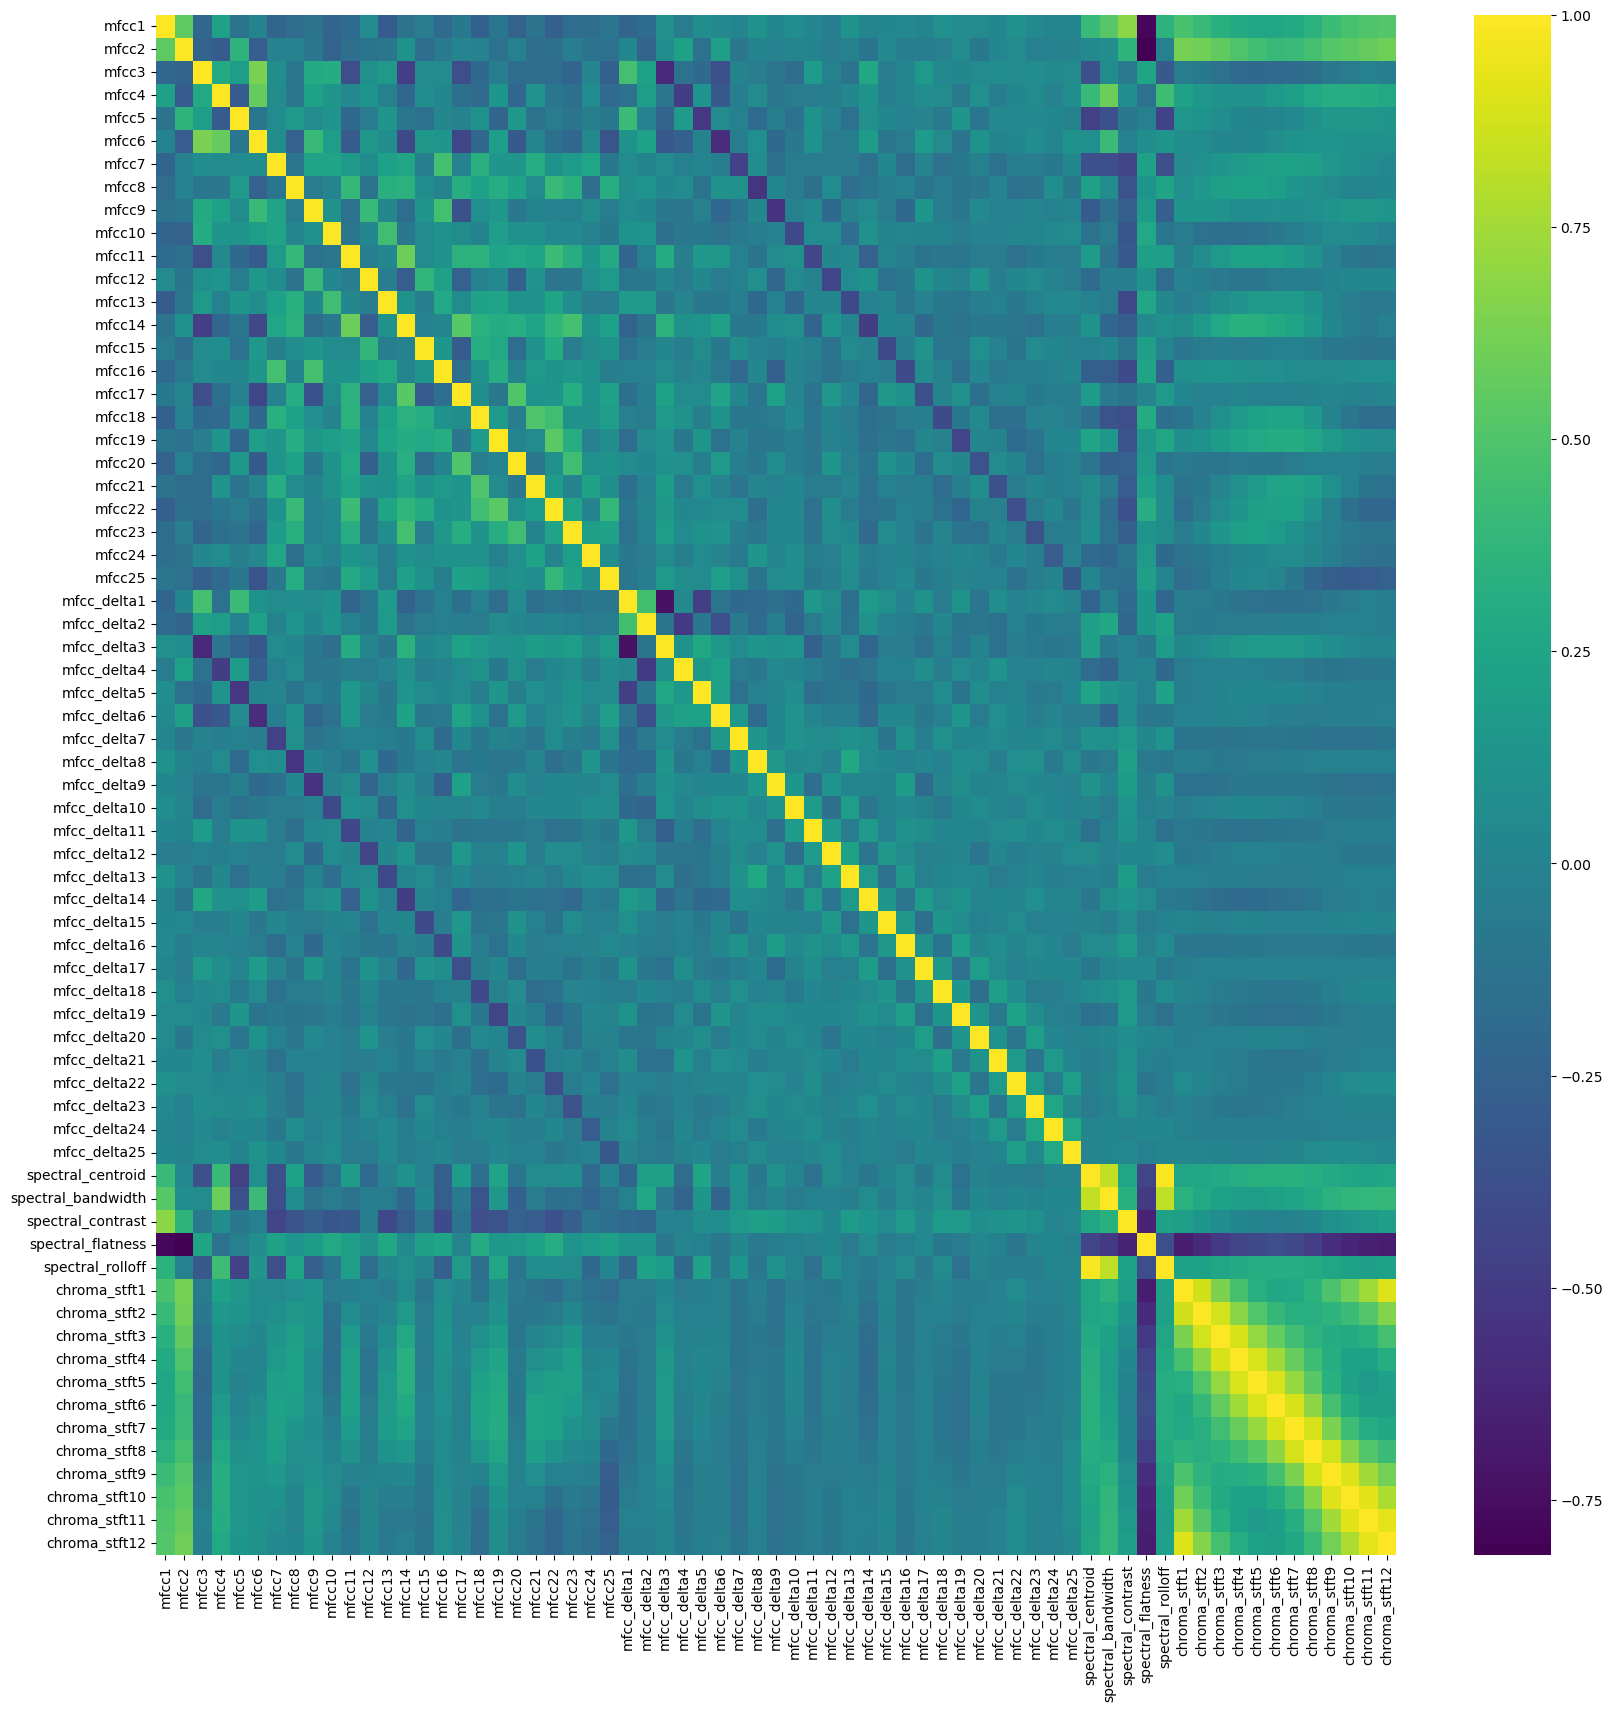

In [15]:
# Select only numeric columns
df_numeric = df_full.select_dtypes(include=['number'])

# Compute the correlation matrix
corr = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr, cmap='viridis')
plt.show()


In [17]:
# create a new df by selecting 5000 random rows of each class from original df
df_50 = df_full.groupby('class').apply(lambda x: x.sample(5000)).reset_index(drop=True)
df_50

/var/folders/ft/ksjmg7nn2tl18xwghcvb4j0r0000gn/T/ipykernel_20449/2449116701.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_50 = df_full.groupby('class').apply(lambda x: x.sample(5000)).reset_index(drop=True)


,audio,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,chroma_stft4,chroma_stft5,chroma_stft6,chroma_stft7,chroma_stft8,chroma_stft9,chroma_stft10,chroma_stft11,chroma_stft12,class
0,cleaned_26096.mp3,-386.27136,103.001130,-6.005743,24.479021,1.543035,10.388543,-8.655593,-1.295418,6.189614,...,0.217867,0.226363,0.242601,0.289608,0.325285,0.358885,0.349750,0.332875,0.285820,Bengali
1,cleaned_19796.mp3,-370.56710,120.901474,8.105752,25.740780,7.703972,7.521254,-0.625469,3.915254,13.063141,...,0.226839,0.238461,0.267048,0.322127,0.370627,0.415922,0.439078,0.445005,0.404501,Bengali
2,cleaned_5195.mp3,-383.33664,82.014890,-4.909435,21.775679,19.259672,8.336844,-12.406589,-0.105609,8.808520,...,0.191180,0.189816,0.180233,0.166255,0.205249,0.256692,0.239494,0.233284,0.257595,Bengali
3,cleaned_22282.mp3,-370.02264,101.509636,-2.331693,0.538064,-14.517569,-13.316167,-8.135789,-9.936801,-4.812864,...,0.201308,0.239921,0.259426,0.153802,0.082525,0.093930,0.116457,0.134940,0.125565,Bengali
4,cleaned_22120.mp3,-417.50494,93.412630,4.511323,-7.606156,-5.422573,-16.489782,-7.658542,3.371600,-5.389490,...,0.197056,0.223552,0.194145,0.136782,0.101988,0.095722,0.106957,0.155685,0.155239,Bengali
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,cleaned_12265.mp3,-335.14725,121.522930,-4.480765,19.699966,5.113605,19.741520,-9.058726,4.480191,-1.415057,...,0.311570,0.253706,0.207939,0.203443,0.245174,0.246342,0.294560,0.336684,0.387305,Telugu
39996,cleaned_19169.mp3,-351.29877,115.736730,-12.814406,15.973970,8.443932,0.884560,-14.893522,1.484105,-6.019299,...,0.127434,0.104157,0.114822,0.161808,0.179075,0.223251,0.244625,0.298638,0.337741,Telugu
39997,cleaned_14944.mp3,-378.96994,106.939590,-9.319227,30.598104,11.717555,-1.301902,-6.226921,5.230371,-4.062183,...,0.144624,0.155250,0.181960,0.229031,0.308559,0.388691,0.375311,0.358526,0.279990,Telugu
39998,cleaned_11800.mp3,-354.41418,103.625470,-44.273228,20.790499,8.064088,-3.596964,-21.744267,-1.876757,-10.134836,...,0.159314,0.129862,0.113258,0.128882,0.136490,0.183813,0.217678,0.259821,0.325674,Telugu


In [19]:
X = df_50.drop(['class', 'audio'], axis=1)
y = df_50['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
rbf_svc = SVC(kernel='rbf')
rbf_svc.fit(X_train, y_train)

SVC()

train accuracy:  0.9905357142857143
test accuracy:  0.9819166666666667
test classification report: 
               precision    recall  f1-score   support

     Bengali       0.98      0.98      0.98      1500
    Gujarati       0.98      0.98      0.98      1500
       Hindi       0.98      0.99      0.99      1500
     Kannada       0.99      0.96      0.97      1500
   Malayalam       0.97      0.99      0.98      1500
     Marathi       0.97      0.98      0.97      1500
       Tamil       1.00      0.99      0.99      1500
      Telugu       0.99      0.99      0.99      1500

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000



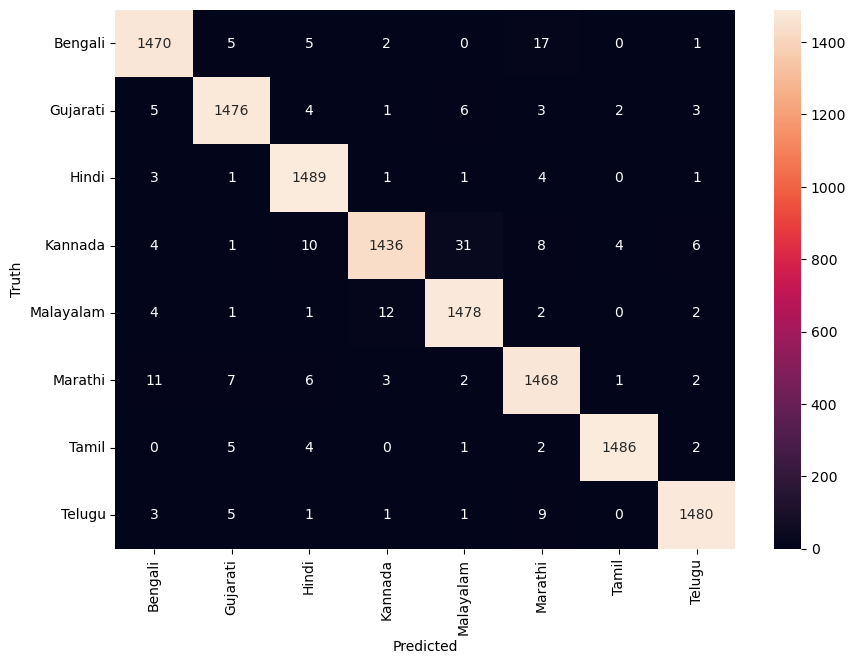

In [23]:
print('train accuracy: ', rbf_svc.score(X_train, y_train))
print('test accuracy: ', rbf_svc.score(X_test, y_test))

print('test classification report: \n', classification_report(y_test, rbf_svc.predict(X_test)))

cm = confusion_matrix(y_test, rbf_svc.predict(X_test))
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.xticks(np.arange(len(df_50['class'].unique())) + 0.5, df_50['class'].unique(), rotation='vertical')
plt.yticks(np.arange(len(df_50['class'].unique())) + 0.5, df_50['class'].unique(), rotation='horizontal')
plt.show()

Grid Search for SVM

In [27]:
C = [0.1, 1, 10, 100]
test_accuracy_rbf = []

for c in C:
    rbf_svc = SVC(kernel='rbf', C=c, random_state=42)
    rbf_svc.fit(X_train, y_train)
    # train_accuracy.append(rbf_svc.score(X_train, y_train))
    test_accuracy_rbf.append([rbf_svc.score(X_test, y_test), c])

In [28]:
test_accuracy_rbf

[[0.9596666666666667, 0.1],
 [0.9819166666666667, 1],
 [0.9865, 10],
 [0.9861666666666666, 100]]

In [29]:
test_accuracy_lin = []

for c in C:
    if c == 100:
        c = 10
    lin_svc = SVC(kernel='linear', C=c, random_state=42)
    lin_svc.fit(X_train, y_train)
    # train_accuracy.append(lin_svc.score(X_train, y_train))
    test_accuracy_lin.append([lin_svc.score(X_test, y_test), c])

test_accuracy_lin

[[0.9514166666666667, 0.1],
 [0.9523333333333334, 1],
 [0.9519166666666666, 10],
 [0.9519166666666666, 10]]

In [31]:
test_accuracy_lin[3][1] = 100
test_accuracy_lin

[[0.9514166666666667, 0.1],
 [0.9523333333333334, 1],
 [0.9519166666666666, 10],
 [0.9519166666666666, 100]]

In [32]:
poly_svc = SVC(kernel='poly', degree=3, random_state=42, C=100)
poly_svc.fit(X_train, y_train)
poly_svc.score(X_test, y_test)

0.9768333333333333

In [33]:
test_accuracy_poly = []

for c in C:
    poly_svc = SVC(kernel='poly', C=c, random_state=42)
    poly_svc.fit(X_train, y_train)
    # train_accuracy.append(poly_svc.score(X_train, y_train))
    test_accuracy_poly.append([poly_svc.score(X_test, y_test), c])

test_accuracy_poly

[[0.9165833333333333, 0.1],
 [0.9678333333333333, 1],
 [0.9766666666666667, 10],
 [0.9768333333333333, 100]]

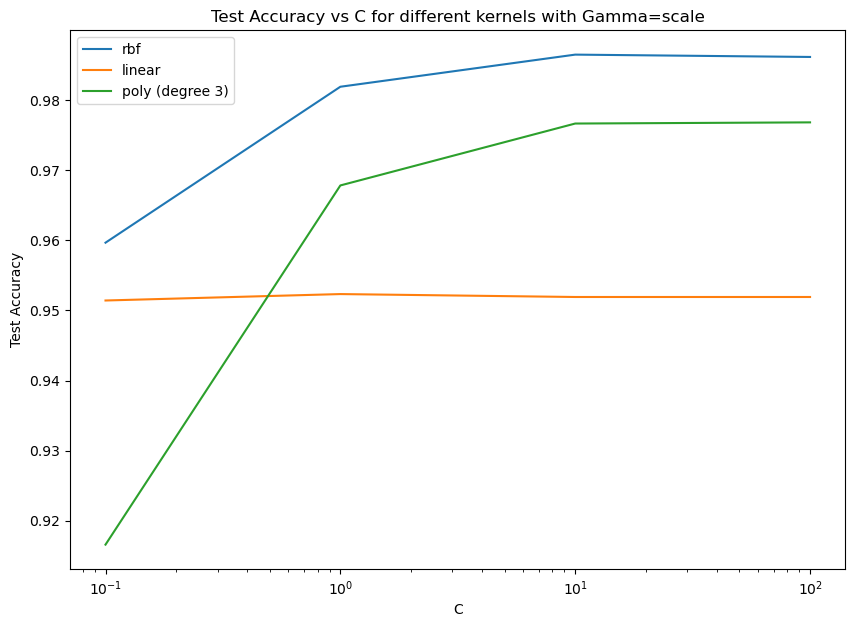

In [34]:
# plot test accuracy vs C for different kernels
plt.figure(figsize=(10, 7))
plt.plot([i[1] for i in test_accuracy_rbf], [i[0] for i in test_accuracy_rbf], label='rbf')
plt.plot([i[1] for i in test_accuracy_lin], [i[0] for i in test_accuracy_lin], label='linear')
plt.plot([i[1] for i in test_accuracy_poly], [i[0] for i in test_accuracy_poly], label='poly (degree 3)')
plt.xlabel('C')
plt.ylabel('Test Accuracy')
plt.xscale('log')
plt.legend()
plt.title('Test Accuracy vs C for different kernels with Gamma=scale')
plt.show()

In [40]:
# implement 5 fold cross validation
from sklearn.model_selection import cross_val_score

scores = []

for c in C:
    rbf_svc = SVC(kernel='rbf', C=c, random_state=42)
    scores.append([cross_val_score(rbf_svc, X, y, cv=5), c])

scores

[[array([0.4855  , 0.49725 , 0.48675 , 0.490125, 0.4925  ]), 0.1],
 [array([0.646   , 0.64625 , 0.6475  , 0.641   , 0.637625]), 1],
 [array([0.8075  , 0.81375 , 0.810875, 0.808625, 0.808875]), 10],
 [array([0.914375, 0.91625 , 0.91275 , 0.908875, 0.919   ]), 100]]

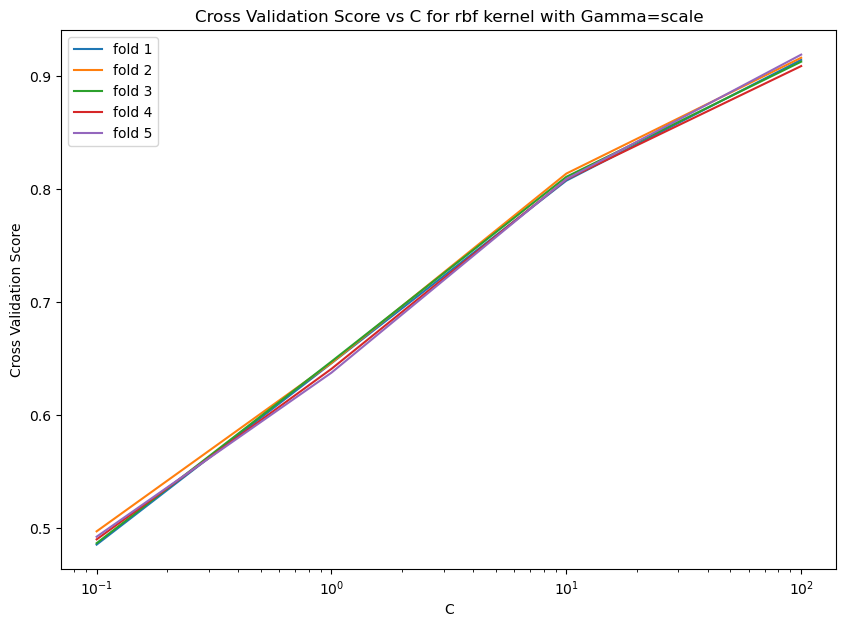

In [41]:
# plot cross validation scores vs C for rbf kernel
plt.figure(figsize=(10, 7))
# plot fold 1
plt.plot([i[1] for i in scores], [i[0][0] for i in scores], label='fold 1')
# plot fold 2
plt.plot([i[1] for i in scores], [i[0][1] for i in scores], label='fold 2')
# plot fold 3
plt.plot([i[1] for i in scores], [i[0][2] for i in scores], label='fold 3')
# plot fold 4
plt.plot([i[1] for i in scores], [i[0][3] for i in scores], label='fold 4')
# plot fold 5
plt.plot([i[1] for i in scores], [i[0][4] for i in scores], label='fold 5')
plt.xlabel('C')
plt.ylabel('Cross Validation Score')
plt.xscale('log')
plt.legend()
plt.title('Cross Validation Score vs C for rbf kernel with Gamma=scale')
plt.show()

In [42]:
train = pd.read_csv('data/data_train.csv')
test = pd.read_csv('data/data_test.csv')

X_train = train.drop('class', axis=1)
y_train = train['class']
X_test = test.drop('class', axis=1)
y_test = test['class']

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
rbf_svc_full = SVC(kernel='rbf', C=10, random_state=42, verbose=True)
rbf_svc_full.fit(X_train, y_train)

[LibSVM]....*..*
optimization finished, #iter = 6641
obj = -1533.352314, rho = -0.364171
nSV = 1123, nBSV = 84
...*..*
optimization finished, #iter = 5091
obj = -1125.873068, rho = -0.342205
nSV = 892, nBSV = 48
....*..*
optimization finished, #iter = 6472
obj = -1234.159793, rho = 0.743910
nSV = 1712, nBSV = 47
...*..*
optimization finished, #iter = 5443
obj = -788.099569, rho = 0.837878
nSV = 1594, nBSV = 16
.......*.....*
optimization finished, #iter = 12197
obj = -2653.704869, rho = -0.421754
nSV = 1667, nBSV = 130
..*..*
optimization finished, #iter = 4367
obj = -1019.445771, rho = -0.300912
nSV = 986, nBSV = 47
..*..*
optimization finished, #iter = 4035
obj = -518.217852, rho = -0.553313
nSV = 835, nBSV = 3
.*..*
optimization finished, #iter = 3020
obj = -1212.724511, rho = -0.122833
nSV = 715, nBSV = 81
....*..*
optimization finished, #iter = 6632
obj = -1838.890949, rho = 0.866682
nSV = 1541, nBSV = 96
..*.*
optimization finished, #iter = 3989
obj = -686.327277, rho = 0.927767


SVC(C=10, random_state=42, verbose=True)

In [44]:
y_pred = rbf_svc_full.predict(X_test)

print('test accuracy: ', accuracy_score(y_test, y_pred))
print('test classification report: \n', classification_report(y_test, y_pred))

test accuracy:  0.9912300301642275
test classification report: 
               precision    recall  f1-score   support

     Bengali       0.99      0.99      0.99      8164
    Gujarati       0.99      0.99      0.99      7868
       Hindi       0.98      1.00      0.99      7636
     Kannada       0.99      0.98      0.98      6488
   Malayalam       0.99      0.99      0.99      7200
     Marathi       0.99      0.99      0.99      7427
       Tamil       1.00      0.99      0.99      7258
      Telugu       0.99      0.99      0.99      1665

    accuracy                           0.99     53706
   macro avg       0.99      0.99      0.99     53706
weighted avg       0.99      0.99      0.99     53706



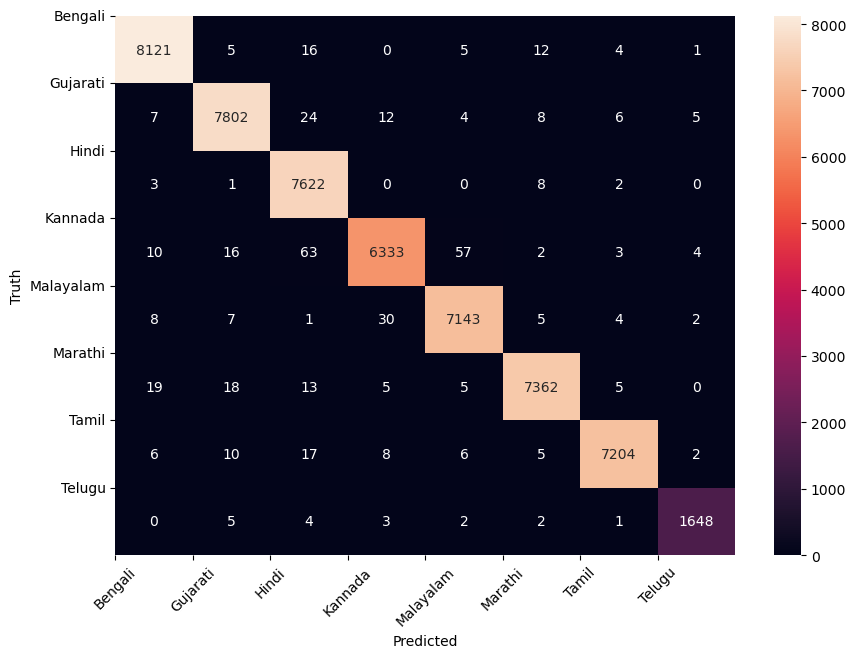

In [52]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
# Corrected tick positions
class_labels = rbf_svc_full.classes_
tick_positions = np.arange(len(class_labels))  # Match number of labels
plt.xticks(tick_positions, class_labels, rotation=45)
plt.yticks(tick_positions, class_labels, rotation=0)
plt.show()

In [54]:
# save the model
with open('models/svm_model.pkl', 'wb') as f:
    pickle.dump(rbf_svc_full, f)